## Portfolio Part 3

In this Portfolio task you will continue working with the movielens data collected by the GroupLens Research Project at the University of Minnesota. The columns in the dataset are a little bit different from the ones provided in the previous Portfolio tasks, where the 'rating' column is replaced by the 'feedback' column. There are two values regarding the 'feedback' with 1 indicating the user likes the corresponding movie; otherwise 0. 

The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | feedback | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __feedback__ - the user's feedback towards the movie (1 means 'like'; 0 means 'dislike')
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may like multiple movies and a same movie (i.e., a same movieId) may be preferred by multiple users.


Your high level goal in this notebook is to try to build and evaluate predictive models for feedback from available features - predict the value of the __feedback__ field in the data from some of the other fields. Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.

Note: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use a ___simple Logistic Regression model___ and ___one of the more advanced methods___ covered in recent weeks. Accordingly, discuss the performance of the simple and advanced methods.

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [292]:
df = pd.read_csv('files/movielens_data_feedback.csv')
df.head()

,userId,age,gender,occupation,movieId,feedback,genre,timestamp
0,196,49,M,writer,242,0,Comedy,881250949
1,186,39,F,executive,302,0,Crime,891717742
2,22,25,M,writer,377,0,Children,878887116
3,244,28,M,technician,51,0,Romance,880606923
4,166,47,M,educator,346,0,Drama,886397596


In [293]:
# Remove null value if exists
df.dropna(inplace = True)

In [306]:
#removing null data 
df.isnull()

,userId,age,gender,occupation,movieId,feedback,genre,timestamp,genre_code,gender_code,occupation_code
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False


In [307]:
#converting categorical type values into numerical type
#first importing OrdinalEncoder inorder to convert

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
df[["genre_code", "gender_code", "occupation_code"]] = ord_enc.fit_transform(df[["genre", "gender", "occupation"]])
df[["genre", "genre_code", "occupation", "occupation_code", "gender", "gender_code"]].head(11)

,genre,genre_code,occupation,occupation_code,gender,gender_code
0,Comedy,4,writer,20,M,1
1,Crime,5,executive,6,F,0
2,Children,3,writer,20,M,1
3,Romance,13,technician,19,M,1
4,Drama,7,educator,3,M,1
5,War,16,executive,6,M,1
6,Action,0,engineer,4,M,1
7,Adventure,1,librarian,10,F,0
8,Romance,13,programmer,14,M,1
9,Drama,7,executive,6,M,1


In [308]:
#Converting numerical into categorical value
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['feedback'] = le.fit_transform(df['feedback'])
df.head()

,userId,age,gender,occupation,movieId,feedback,genre,timestamp,genre_code,gender_code,occupation_code
0,196,49,M,writer,242,0,Comedy,881250949,4,1,20
1,186,39,F,executive,302,0,Crime,891717742,5,0,6
2,22,25,M,writer,377,0,Children,878887116,3,1,20
3,244,28,M,technician,51,0,Romance,880606923,13,1,19
4,166,47,M,educator,346,0,Drama,886397596,7,1,3


In [420]:
new_df = df[['age','gender_code','occupation_code','genre_code','feedback']]
new_df.head()

,age,gender_code,occupation_code,genre_code,feedback
0,49,1,20,4,0
1,39,0,6,5,0
2,25,1,20,3,0
3,28,1,19,13,0
4,47,1,3,7,0


In [373]:
#correlations between age/genre/gender/occupation and feedback

corr_age = new_df['age'].corr(new_df['feedback']) 
corr_genre = new_df['genre_code'].corr(new_df['feedback'])
corr_gender = new_df['gender_code'].corr(new_df['feedback'])
corr_occupation = new_df['occupation_code'].corr(new_df['feedback'])

print('Correlation between age and feedback: ', corr_age)
print('Correlation between genre_code and feedback: ', corr_genre)
print('Correlation between gender_code and feedback: ', corr_gender)
print('Correlation between occupation_code and feedback: ', corr_occupation)

Correlation between age and feedback:  0.03931701191716567
Correlation between genre_code and feedback:  0.04140106183052046
Correlation between gender_code and feedback:  -0.0011261467104624495
Correlation between occupation_code and feedback:  -0.02280020926421381


#### From above, we came to know that:
    Feedback is more correlated with age and genre. 
    Feedback is relatively less correlated with user gender and occupation.
    As the values are quite lower than 1, feedback doesn't appear to be perfectly correlated with the four features.

In [374]:
new_df.shape

(100000, 5)

<AxesSubplot:xlabel='feedback', ylabel='count'>

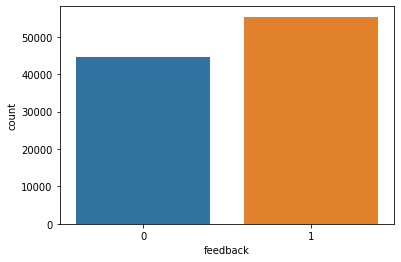

In [375]:
sns.countplot(x='feedback', data=new_df)

In [376]:
new_df['feedback'].value_counts()

1    55375
0    44625
Name: feedback, dtype: int64

In [377]:
# checking number of likes and dislkes count
print("who not like to buy: ", df[df['feedback'] == 0].shape[0])
print("who likes to buy: ", df[df['feedback'] == 1].shape[0])

who not like to buy:  44625
who likes to buy:  55375


In [378]:
new_df.groupby('feedback').mean()

,age,gender_code,occupation_code,genre_code
feedback,,,,
0,32.46344,0.743148,11.244549,7.240762
1,33.37795,0.742158,10.940786,7.648108


<AxesSubplot:xlabel='feedback', ylabel='count'>

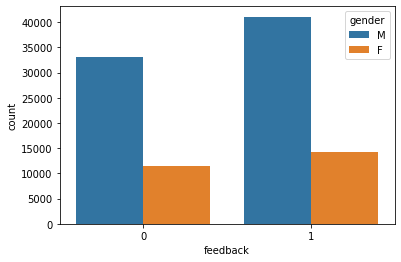

In [379]:
sns.countplot(x = "feedback", hue = "gender", data = df)

### Building a model: simple logistic regression


In [381]:
#first import some of the sklearn and regresssion module
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [510]:
X = new_df.drop(['feedback'], axis=1)

y = df['feedback']

In [522]:
# Split  data into training(70%) and testing data (30%) and use random_state=142
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((70000, 4), (30000, 4))

In [513]:
# Training Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [503]:
# Doing predictions on train and test set
y_ped_train = model.predict(X_train)
y_ped_test = model.predict(X_test)

In [514]:
y_ped_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Evaluation




In [518]:
# Evaluate the performance of your trained model

print("Accuracy score on training set: ", accuracy_score(y_train, y_ped_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_ped_test))

Accuracy score on training set:  0.5536
Accuracy score on testing set:  0.5515


In [521]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_ped_test))

Confusion matrix on test set: 
[[  316 13053]
 [  402 16229]]


In [508]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_ped_train))

Confusion matrix on train set: 
[[  853 30403]
 [  845 37899]]


In the output, 853   and 37899 are actual predictions, and 845  and 30403 are incorrect predictions.

In [467]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [468]:
# doing evaluation
y_test_ped = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_ped))

accuracy score on test set:  0.55755


In [469]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000


In [470]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.5578
Acc on test set using 2 features:  0.55665
Acc on test set using 3 features:  0.55755
Acc on test set using 4 features:  0.55755
Acc on test set using 5 features:  0.55755
Acc on test set using 6 features:  0.55755
Acc on test set using 7 features:  0.55755
Acc on test set using 8 features:  0.55755
Acc on test set using 9 features:  0.55755


In [480]:
prediction = model.predict(X_test)
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.44      0.02      0.04     13369\n           1       0.55      0.98      0.71     16631\n\n    accuracy                           0.55     30000\n   macro avg       0.50      0.50      0.38     30000\nweighted avg       0.50      0.55      0.41     30000\n'

## K- nearest model

In [483]:
new_df


,age,gender_code,occupation_code,genre_code,feedback
0,49,1,20,4,0
1,39,0,6,5,0
2,25,1,20,3,0
3,28,1,19,13,0
4,47,1,3,7,0
...,...,...,...,...,...
99995,13,1,18,4,0
99996,36,0,0,14,1
99997,21,1,18,15,0
99998,47,1,3,4,0


In [484]:
#split into training and data set.
X = new_df.iloc[:, 0:4]
y = new_df.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [485]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [528]:
#import KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [525]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [3]:
knn.predict_proba(X_test)[:,0]

NameError: name 'knn' is not defined

In [527]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5478


In [489]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6487  6882]
 [ 5510 11121]]
              precision    recall  f1-score   support

           0       0.54      0.49      0.51     13369
           1       0.62      0.67      0.64     16631

    accuracy                           0.59     30000
   macro avg       0.58      0.58      0.58     30000
weighted avg       0.58      0.59      0.58     30000



In [529]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

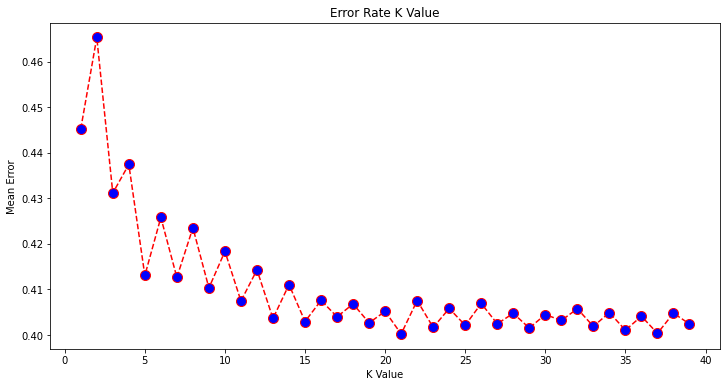

In [491]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## When K = 6

In [538]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [539]:
y_pred_6 = classifier.predict(X_test)

In [540]:
print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.5749


### When K = 7

In [541]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)


# fit the model to the training set
classifier.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = classifier.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.5911


Interpretation
Our original model accuracy score with k=4 is 0.5478. Now, we can see that if we increase the value of k further, this would result in enhanced accuracy. With the increment in the value of k=6,7  we get accuracy score of 0.5911. So, it results in performance improvement.

We can conclude that our classification model accuracy is very good as per above result.
